In [22]:
from dotenv import load_dotenv
import os
load_dotenv()  # take environment variables from .env.

from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token=os.getenv('QISKIT_IBM_TOKEN'))

Transpiler is made of 2 primary components:
- pass- it transforms the circuit from its current state into a new state that follows the task that it is configured to perform
- passmanager - to specify passes you wish to use, it allows indivuduall passes to communicate among each other.

In [24]:
from qiskit.transpiler import passes

print(dir(passes))

['ALAPSchedule', 'ALAPScheduleAnalysis', 'AQCSynthesisPlugin', 'ASAPSchedule', 'ASAPScheduleAnalysis', 'AlignMeasures', 'ApplyLayout', 'BarrierBeforeFinalMeasurements', 'BasicSwap', 'BasisTranslator', 'CSPLayout', 'CXCancellation', 'CheckGateDirection', 'CheckMap', 'Collect1qRuns', 'Collect2qBlocks', 'CollectAndCollapse', 'CollectCliffords', 'CollectLinearFunctions', 'CollectMultiQBlocks', 'CommutationAnalysis', 'CommutativeCancellation', 'CommutativeInverseCancellation', 'Commuting2qGateRouter', 'ConsolidateBlocks', 'ConstrainedReschedule', 'ContainsInstruction', 'ConvertConditionsToIfOps', 'CountOps', 'CountOpsLongestPath', 'DAGFixedPoint', 'DAGLongestPath', 'Decompose', 'DenseLayout', 'Depth', 'DynamicalDecoupling', 'EchoRZXWeylDecomposition', 'ElidePermutations', 'EnlargeWithAncilla', 'Error', 'FilterOpNodes', 'FixedPoint', 'FullAncillaAllocation', 'GateDirection', 'GatesInBasis', 'HLSConfig', 'HighLevelSynthesis', 'HoareOptimizer', 'InstructionDurationCheck', 'InverseCancellation'

In [25]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, QuantumCircuit

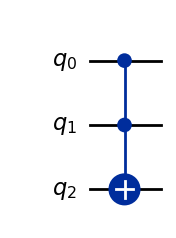

In [26]:
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.draw("mpl")

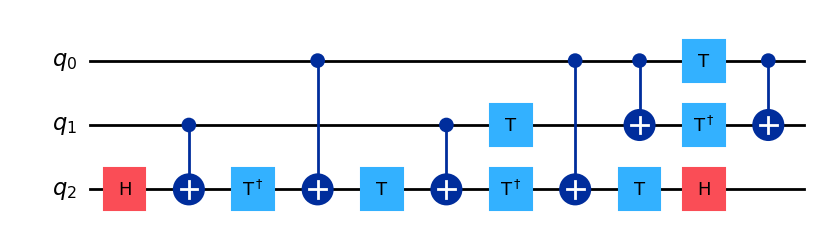

In [27]:
qc_decomposed = qc.decompose()
qc_decomposed.draw("mpl")

In [28]:
qc=QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()

┌───┐               
q_0: ┤ H ├──■────■────■──
     └───┘┌─┴─┐  │    │  
q_1: ─────┤ X ├──┼────┼──
          └───┘┌─┴─┐  │  
q_2: ──────────┤ X ├──┼──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

In [29]:
qc_decomposed=qc.decompose()
qc_decomposed.draw()

┌─────────┐               
q_0: ┤ U2(0,π) ├──■────■────■──
     └─────────┘┌─┴─┐  │    │  
q_1: ───────────┤ X ├──┼────┼──
                └───┘┌─┴─┐  │  
q_2: ────────────────┤ X ├──┼──
                     └───┘┌─┴─┐
q_3: ─────────────────────┤ X ├
                          └───┘

In [30]:
print('Initial circuit depth: ', qc.depth())
print('Decomposed circuit depth: ', qc_decomposed.depth())
print('Initial circuit operation count: ', qc.count_ops())
print('Decomposed circuit operation count: ', qc_decomposed.count_ops())

Initial circuit depth:  4
Decomposed circuit depth:  4
Initial circuit operation count:  OrderedDict({'cx': 3, 'h': 1})
Decomposed circuit operation count:  OrderedDict({'cx': 3, 'u2': 1})


In [32]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [34]:
ibm_backend = service.backend("ibm_kyiv")

In [39]:
ibm_backend.__dict__

{'_options': Options(shots=4000, memory=False, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, init_qubits=True, use_measure_esp=None, use_fractional_gates=False, noise_model=None, seed_simulator=None),
 '_provider': None,
 'name': 'ibm_kyiv',
 'description': None,
 'online_date': datetime.datetime(2022, 4, 12, 4, 0, tzinfo=tzutc()),
 'backend_version': '1.20.22',
 '_coupling_map': None,
 '_instance': 'ibm-q/open/main',
 '_service': <QiskitRuntimeService>,
 '_api_client': <qiskit_ibm_runtime.api.clients.runtime.RuntimeClient at 0x7f4871db3ac0>,
 '_configuration': <qiskit_ibm_runtime.models.backend_configuration.PulseBackendConfiguration at 0x7f48735496d0>,
 '_properties': <qiskit_ibm_runtime.models.backend_properties.BackendProperties at 0x7f4871b8f100>,
 '_defaults': <qiskit_ibm_runtime.models.pulse_defaults.PulseDefaults at 0x7f4871b8e8b0>,
 '_target': <qiskit.transpiler.target.

> Notes
> - T1 (Energy Relaxation Time): Longer T1 is better because it means the qubit can maintain its excited state (and thus store quantum information) for longer.
> - T2 (Decoherence Time): Longer T2 is better because it means the qubit can maintain superposition for longer.:

In [42]:
from qiskit import visualization

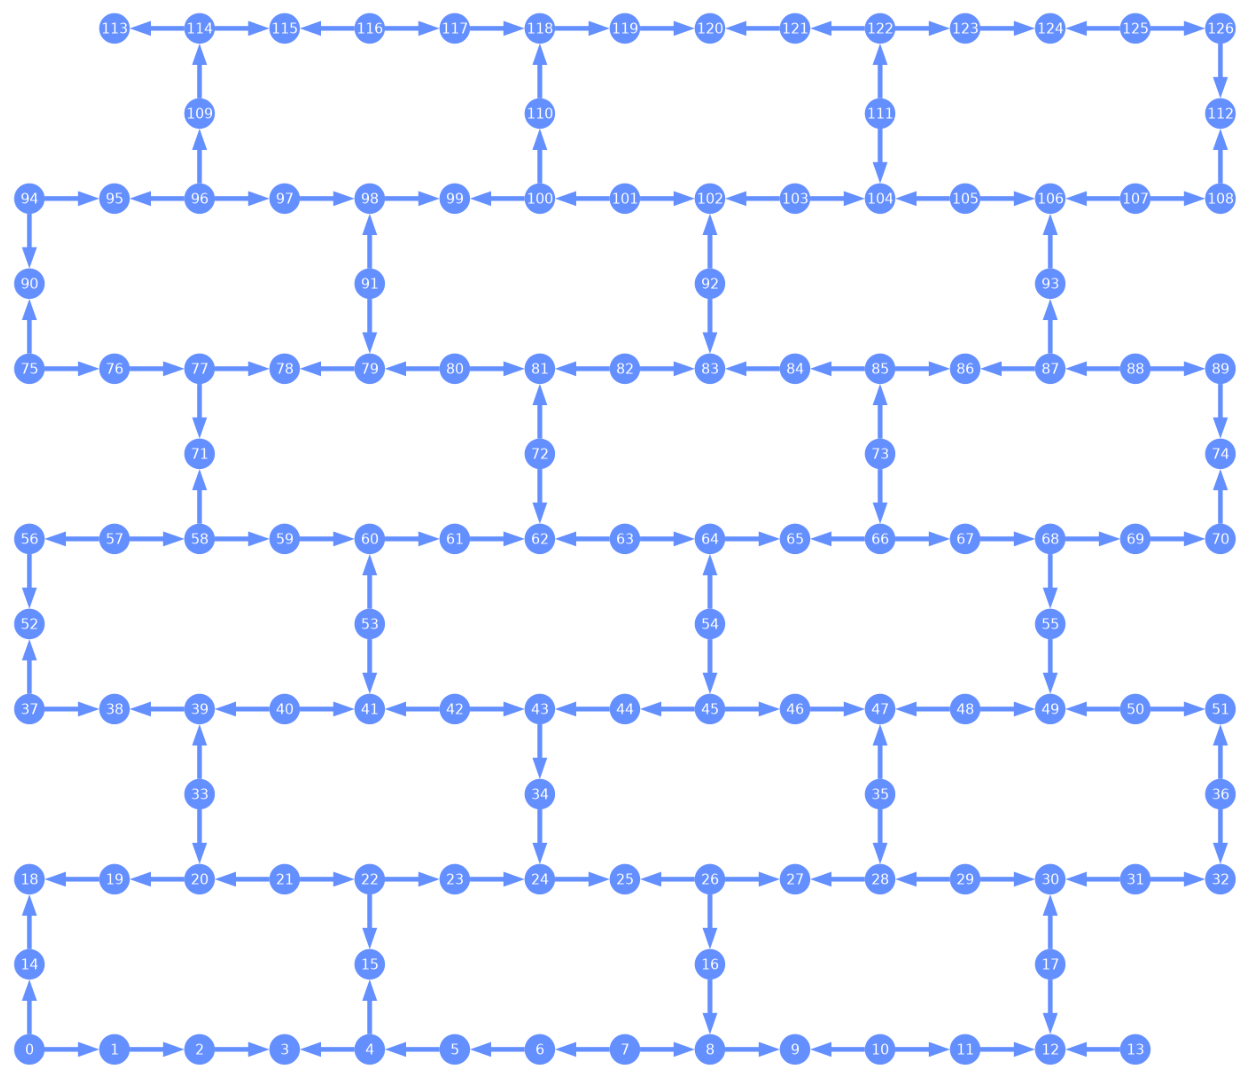

In [46]:
visualization.plot_gate_map(service.backend('ibm_kyiv'), plot_directed=True)

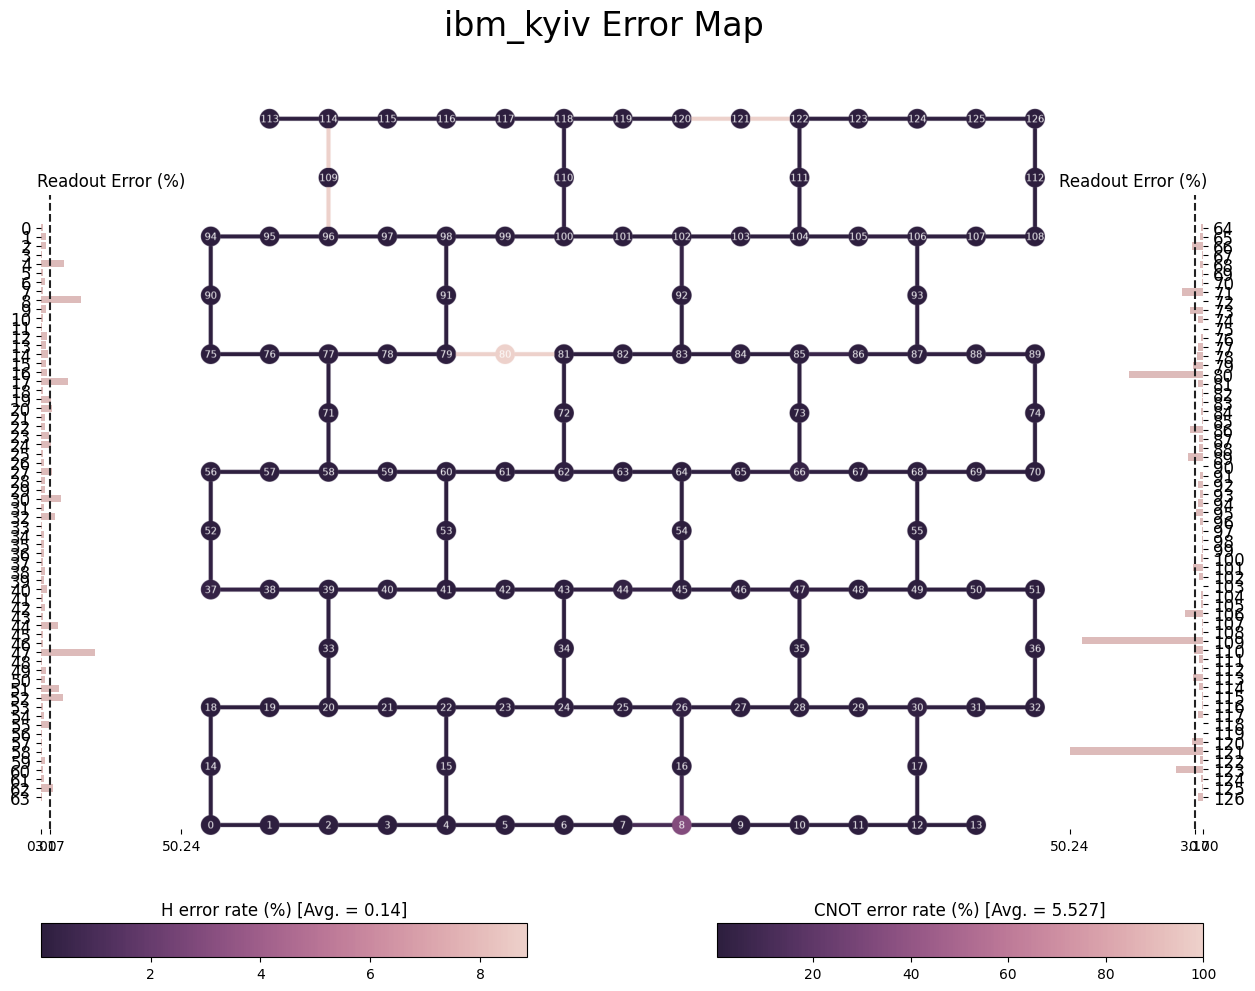

In [50]:
visualization.plot_error_map(service.backend('ibm_kyiv'))

In [53]:
from qiskit.transpiler import generate_preset_pass_manager

In [55]:
pm = generate_preset_pass_manager(backend=ibm_backend, optimization_level=1)

transpiled_qc = pm.run(qc)

print('Initial circuit depth: ', qc.depth())
print('Decomposed circuit depth: ', qc_decomposed.depth())
print('Transpiled circuit depth: ', transpiled_qc.depth())
print('Initial circuit operation count: ', qc.count_ops())
print('Decomposed circuit operation count: ', qc_decomposed.count_ops())
print('Transpiled circuit operation count: ', transpiled_qc.count_ops())


Initial circuit depth:  4
Decomposed circuit depth:  4
Transpiled circuit depth:  11
Initial circuit operation count:  OrderedDict({'cx': 3, 'h': 1})
Decomposed circuit operation count:  OrderedDict({'cx': 3, 'u2': 1})
Transpiled circuit operation count:  OrderedDict({'rz': 15, 'sx': 10, 'ecr': 3})


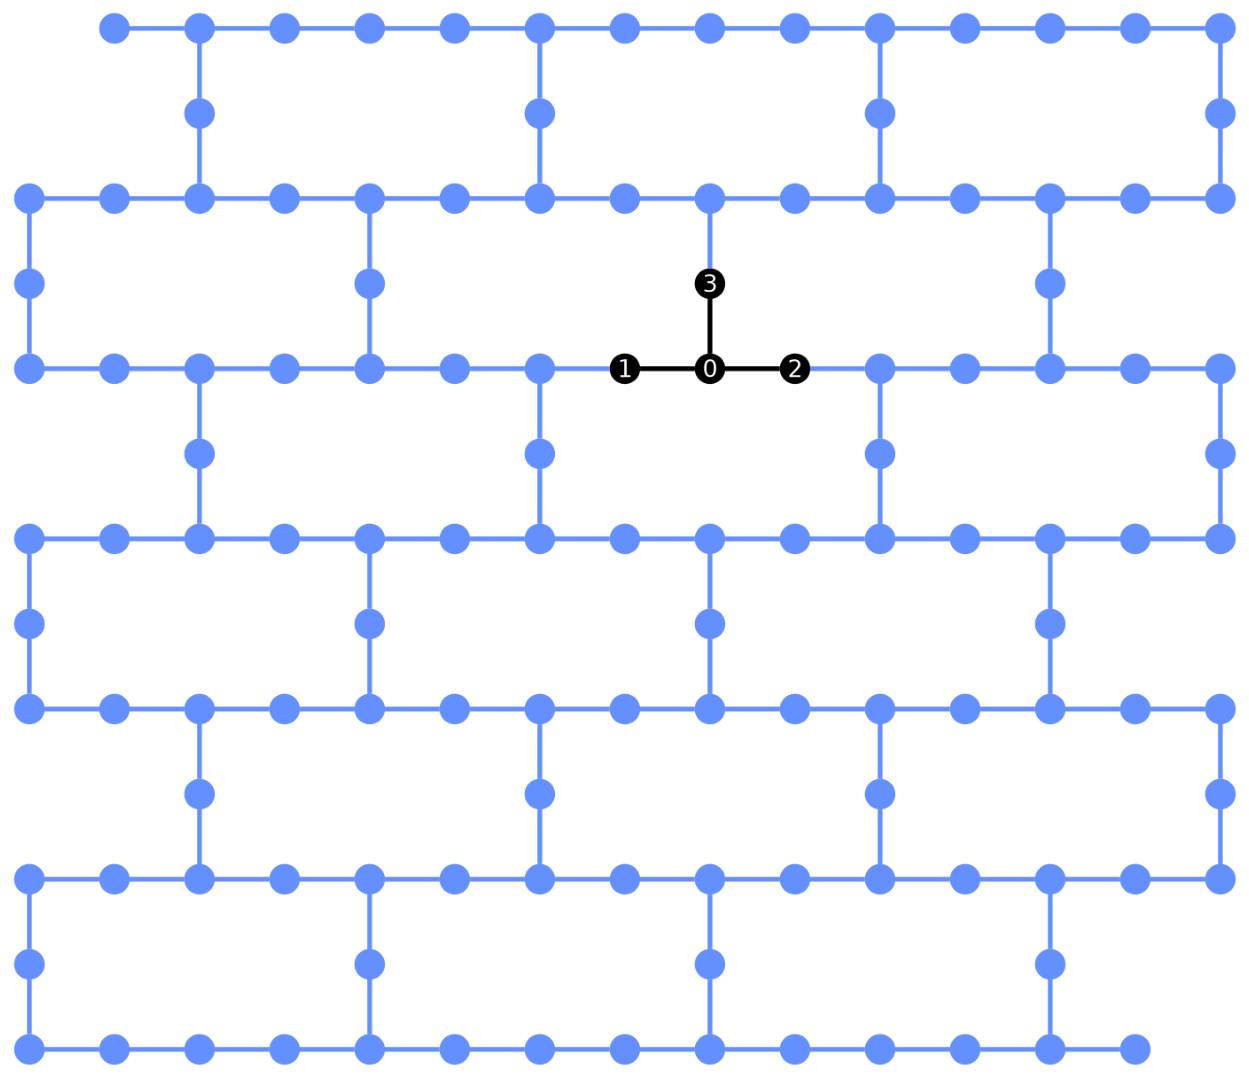

In [56]:
visualization.plot_circuit_layout(transpiled_qc, ibm_backend)